In [ ]:
# Dataset in Sheets Link
# https://docs.google.com/spreadsheets/d/e/2PACX-1vSNeLrhjSBnnKZw2-1Ji8mEmZ-UlAJIVdeUgXR7XuSSY1CcnwZBkxqTleYG73lWHBuh-55nAwc5OdU1/pub?gid=1695202385&single=true&output=csv


In [1]:
import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSNeLrhjSBnnKZw2-1Ji8mEmZ-UlAJIVdeUgXR7XuSSY1CcnwZBkxqTleYG73lWHBuh-55nAwc5OdU1/pub?gid=1695202385&single=true&output=csv")

# Analuyzing the data - basic analysis
data.head()
data.tail()
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
data.shape  # gives shape[0] == rows, shape[1] == columns

data.describe()
# Statistic and Categorical Description
data.describe(include='all')
data.isnull()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [22]:
# Dropping Irrelevant Data/Columns
data.columns

# data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1) #Axis = 1 bcoz, we are telling that we are dropping columns coz by default axiz=0 which is rows

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [23]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [25]:
# Now we will encoding the categorical data i.e. converting string into numbers
data['Geography'].unique() #This has 3 values - France, Spain, Germany so we will assign a numerical values to each one of those three values


array(['France', 'Spain', 'Germany'], dtype=object)


now we will be assigning binary values:


```
F S G
```

0 0 1

0 1 0

1 0 0


these variables are called as dummy variables so to create this dummy vairble we use getdummies method from pandas

In [29]:
# pd.get_dummies(data)
# now if we put data as parameter it will create DUMMY VARIABLE TRAP, a problematic a situation where the presence of one or more dummy variables can be predicted from the others.
# This can cause multicollinearity in statistical models, leading to unreliable and unstable results
# The dummy variable trap occurs when we create dummy variables for all categories of a categorical variable, including a reference category

# To avoid the dummy variable trap, we can drop one of the dummy variables. In Pandas, we can achieve this by setting the drop_first parameter to True when calling pd.get_dummies(data)
# This will drop the first dummy variable for each categorical variable, eliminating the multicollinearity issue

data = pd.get_dummies(data, drop_first=True)
data
# now geography is converted in o 3 seperate columns adn one is removed, so is the case with gender column also


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [31]:
#Handling Imbalanced dS
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

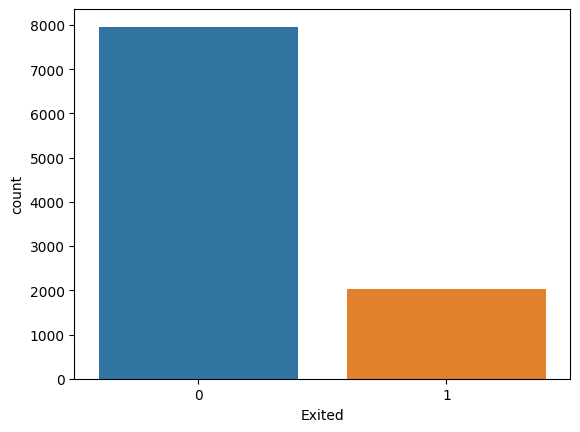

In [39]:
import seaborn as sns
sns.countplot(x='Exited', data=data[data['Exited'].isin([0, 1])])

Imbalance DS = DS where target/ouput is unevenly distributed of values
i.e. it should have 50% 50% ouptut as YES or NO

this ds is umbaalance ds

In [47]:
X = data.drop(['Exited'], axis=1)
Y = data['Exited']
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [51]:
# Train and Test Splitting Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y) # takes input adn output  adn test size
# random_state, tells that the data splitting process will produce the same train and test sets every time you run the code with the same random_state value.
# When stratify is set to Y, the data will be split in a way that preserves the proportion of classes in the target variable Y(80-20). improve the performance of model

here we train our model using xtrain, ytrain

and test it using xtest

and compare the test results with ytest




**# FEATURE SCALING**

Here different columsn can have different ranges such as age(18-60), tenure(1-25) etc

so we bring all range to similar scale(0-1 etc)  using min-max or normalization

in ML algos which dont require featur sclaing are non-linear models(decsion tree, adaboost, random forest),

rest of linear and logistoic regression needs it

In [57]:
# Any algorithm which is not distance based doesnot require feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train

# Now all the features are in same scale

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

In [59]:
# SHOW TIME

# We use Logistic Regression
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train, Y_train)


LogisticRegression()

In [62]:
y_predicted_by_model1 = model1.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_predicted_by_model1)

0.809

Now we got 80.9% accuracy as it was imbalanced dataset  

using accuracy as metrics in imbalanced dataset is very dangerous, so we need to precision recall and f1 score

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("F1: ",f1_score(Y_test, y_predicted_by_model1))
print("Precision: ",precision_score(Y_test, y_predicted_by_model1))
print("Recall: ",recall_score(Y_test, y_predicted_by_model1))

F1:  0.29259259259259257
Precision:  0.5939849624060151
Recall:  0.1941031941031941


# PRECISON = Models ability to correctly predict the positives out of all the positives ie. tru positive/sum of true positive + sum of false positive

# Recall = Models ability to correctly predict the positives out of all the ACTUAL positives ie. tru positive/sum of true positive  sum of false negatives

# f1=combines precision and recall


In [ ]:
# To handle imbalanced data we can use OVERSAMPLING or UnDERSAMPLING as two methods
# -) we can oversample the minority dataset using replacement (SMOTE method - Synthtiec Minority Oversampling Method)
# -) we can undersample the majority dataset(randomly delete the rows) to match minority (we can loose lot of data, so we dont use that)

In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, Y_res = smote.fit_resample(X, Y)

1    7963
0    7963
Name: Exited, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

from sklearn.linear_model import LogisticRegression
Balancedmodel1=LogisticRegression()
Balancedmodel1.fit(X_res, Y_res)


LogisticRegression()

In [81]:
y_predicted_by_Balancedmodel1 = Balancedmodel1.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_predicted_by_Balancedmodel1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7206528562460766

Now after we got Balanced Dataset using SMOTE, the accuracy is 72%

In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("F1: ",f1_score(Y_test, y_predicted_by_Balancedmodel1))
print("Precision: ",precision_score(Y_test, y_predicted_by_Balancedmodel1))
print("Recall: ",recall_score(Y_test, y_predicted_by_Balancedmodel1))

F1:  0.707044107965767
Precision:  0.7232323232323232
Recall:  0.6915647134578236


# **Other Models to find which the best model**

In [103]:
# Linear Regression
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train, Y_train)

y_predicted_by_model1 = model1.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_predicted_by_model1)

0.7912743251726303

In [110]:
# After Balancing the Dataste - LR
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

from sklearn.linear_model import LogisticRegression
Balancedmodel1=LogisticRegression()
Balancedmodel1.fit(X_res, Y_res)
y_predicted_by_Balancedmodel1 = Balancedmodel1.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_predicted_by_Balancedmodel1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7206528562460766

In [104]:
# Support Vector Classifier
from sklearn import svm
model2 = svm.SVC()
model2.fit(X_train, Y_train)
y_predicted_by_model2 = model2.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

print("Accuracy: ", accuracy_score(Y_test, y_predicted_by_model2))
# print("F1: ",f1_score(Y_test, y_predicted_by_model2))
# print("Precision: ",precision_score(Y_test, y_predicted_by_model2))
# print("Recall: ",recall_score(Y_test, y_predicted_by_model2))

Accuracy:  0.8468298807281858


In [105]:
# Now KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()
model3.fit(X_train, Y_train)
y_predicted_by_model3 = model3.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_predicted_by_model3))
# print("F1: ",f1_score(Y_test, y_predicted_by_model3))
# print("Precision: ",precision_score(Y_test, y_predicted_by_model3))
# print("Recall: ",recall_score(Y_test, y_predicted_by_model3))

Accuracy:  0.815442561205273


In [106]:
# now Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(X_train, Y_train)
y_predicted_by_model4 = model4.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_predicted_by_model4))
# print("F1: ",f1_score(Y_test, y_predicted_by_model4))
# print("Precision: ",precision_score(Y_test, y_predicted_by_model4))
# print("Recall: ",recall_score(Y_test, y_predicted_by_model4))

Accuracy:  0.7919020715630886


In [107]:
# Now Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()
model5.fit(X_train, Y_train)
y_predicted_by_model5 = model5.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_predicted_by_model5))
# print("F1: ",f1_score(Y_test, y_predicted_by_model5))
# print("Precision: ",precision_score(Y_test, y_predicted_by_model5))
# print("Recall: ",recall_score(Y_test, y_predicted_by_model5))

Accuracy:  0.8581293157564344


In [108]:
# Now Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier
model6 = GradientBoostingClassifier()
model6.fit(X_train, Y_train)
y_predicted_by_model6 = model6.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_predicted_by_model6))
# print("F1: ",f1_score(Y_test, y_predicted_by_model6))
# print("Precision: ",precision_score(Y_test, y_predicted_by_model6))
# print("Recall: ",recall_score(Y_test, y_predicted_by_model6))

Accuracy:  0.8502824858757062


# **VISUALIZING THE OUTPUTS of Different Models**

In [112]:
# Comparing all the Model
final_data = pd.DataFrame({'Models':['Logisitic Regression','After Balancing', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boost'],
                           'Accuracy':[accuracy_score(Y_test, y_predicted_by_model1),
                                       accuracy_score(Y_test, y_predicted_by_Balancedmodel1),
                                       accuracy_score(Y_test, y_predicted_by_model2),
                                       accuracy_score(Y_test, y_predicted_by_model3),
                                       accuracy_score(Y_test, y_predicted_by_model4),
                                       accuracy_score(Y_test, y_predicted_by_model5),
                                       accuracy_score(Y_test, y_predicted_by_model6)]})
final_data

,Models,Accuracy
0,Logisitic Regression,0.791274
1,After Balancing,0.720653
2,SVC,0.846830
3,KNN,0.815443
4,Decision Tree,0.791902
5,Random Forest,0.858129
6,Gradient Boost,0.850282


<Axes: xlabel='Models', ylabel='Accuracy'>

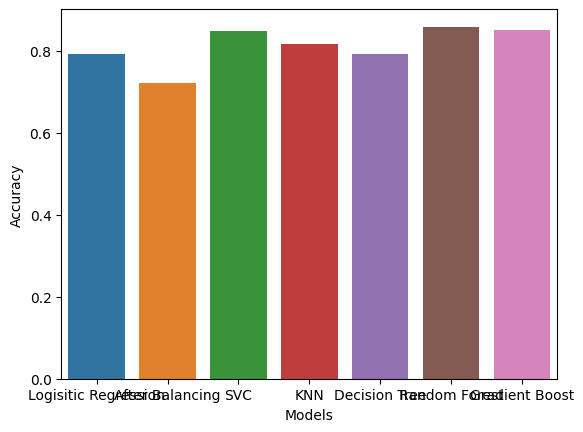

In [115]:
sns.barplot(x='Models', y='Accuracy', data=final_data)

# **NOW WE WILL TAKE RANDOM FOREST CLASSIFER bcoz it is best and More ACCURATE**

In [116]:
# Saving
X_train=sc.fit_transform(X_res)
model5.fit(X_res, Y_res)

# Now we have checked with entire dataset


RandomForestClassifier()

In [121]:
import pickle
pickle.dump(model5, open('customer_churn_predictor.pkl', 'wb'))

pickled_model = pickle.load(open('customer_churn_predictor.pkl', 'rb'))


In [122]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [126]:
# pickled_model.predict([[619, 42,2,0.00,1,1,1,1010348.88,0,0,0]]) #= EXITED
pickled_model.predict([[608, 41,1,83807.86,1,0,1,112542.58,0,1,0]]) # - NOT EXITED

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

# **TAKING USER INPUT**

In [127]:
import pickle

# Load the trained model
pickled_model = pickle.load(open('customer_churn_predictor.pkl', 'rb'))

# Take user input
credit_score = float(input("Enter the customer's credit score: "))
age = int(input("Enter the customer's age: "))
tenure = int(input("Enter the customer's tenure: "))
balance = float(input("Enter the customer's balance: "))
num_of_products = int(input("Enter the number of products the customer has: "))
has_credit_card = int(input("Enter 1 if the customer has a credit card, 0 otherwise: "))
is_active_member = int(input("Enter 1 if the customer is an active member, 0 otherwise: "))
estimated_salary = float(input("Enter the customer's estimated salary: "))
is_female = int(input("Enter 1 if the customer is female, 0 otherwise: "))
is_spain = int(input("Enter 1 if the customer is from Spain, 0 otherwise: "))
is_germany = int(input("Enter 1 if the customer is from Germany, 0 otherwise: "))

# Create input data as a list
input_data = [[credit_score, age, tenure, balance, num_of_products, has_credit_card, is_active_member, estimated_salary, is_female, is_spain, is_germany]]

output = pickled_model.predict(input_data)
if output[0] == 1:
    print("\nThe customer is predicted to churn.")
else:
    print("\nThe customer is predicted not to churn.")

Enter the customer's credit score: 42
Enter the customer's age: 20
Enter the customer's tenure: 3
Enter the customer's balance: 521479
Enter the number of products the customer has: 1
Enter 1 if the customer has a credit card, 0 otherwise: 1
Enter 1 if the customer is an active member, 0 otherwise: 1
Enter the customer's estimated salary: 32145
Enter 1 if the customer is female, 0 otherwise: 1
Enter 1 if the customer is from Spain, 0 otherwise: 1
Enter 1 if the customer is from Germany, 0 otherwise: 0
The customer is predicted not to churn.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
